In [1]:
import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [21]:
def plot_cubic(w, optimizer):
    losses = []
    W = torch.arange(-4, 4 ,0.1)
    for w.state_dict()['linear.weight'][0] in W:
        losses.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    epochs = 10
    parameter = []
    loss_list = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, loss_list, 'ro', label = 'parameter values')
    plt.plot(W.numpy(), losses, label = 'objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()
    plt.show()

In [22]:

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(parameter, loss_list, 'ro',label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [23]:
class one_param(nn.Module):
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias = False)
    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

In [24]:
w = one_param(1, 1)

In [25]:
def cubic(y_hat):
    out = y_hat**3
    return out

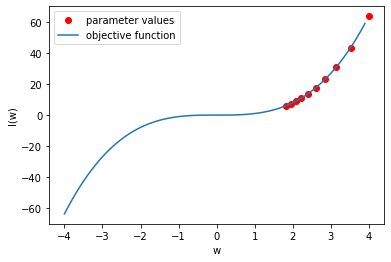

In [26]:
optimizer = torch.optim.SGD(w.parameters(), lr = 0.01, momentum = 0)
plot_cubic(w, optimizer)

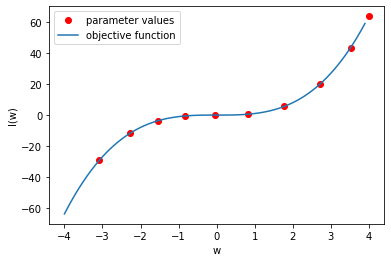

In [27]:
optimizer = torch.optim.SGD(w.parameters(), lr = 0.01, momentum = 0.9)
plot_cubic(w, optimizer)

In [30]:
def fourth_order(y_hat):
    out = torch.mean(2 * (y_hat**4) - 9 * (y_hat**3) - 21 * (y_hat**2) + 88 * y_hat + 48)
    return out

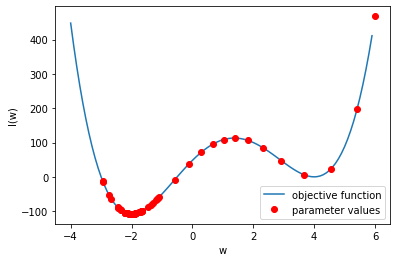

In [31]:
optimizer = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer)

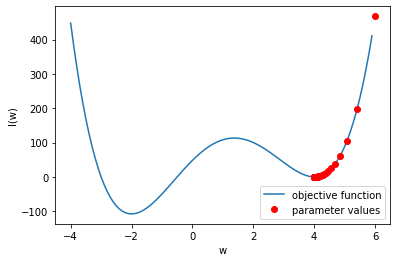

In [32]:
optimizer = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer)

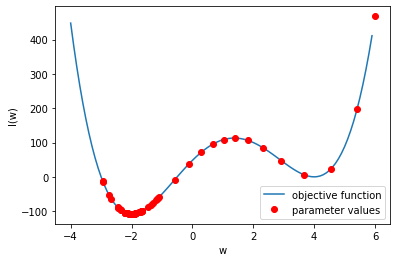

In [35]:
optimizer = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer)

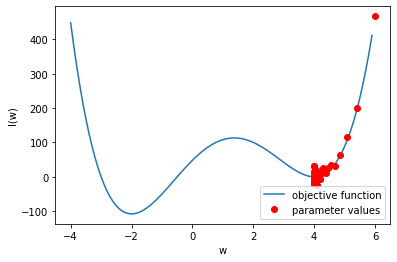

In [36]:
optimizer = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer, std = 10)

In [ ]:
optimizer = torch.optim.SGD(w.parameters(), lr  )